### First install and import required packages. 

In [1]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import graphviz
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.metrics import classification_report, confusion_matrix
import itertools

%matplotlib inline

#### Read the dataset. Remove duplicate column.

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.drop(df.columns[13], axis=1, inplace = True)
print(df.shape)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 37)


### Get the columns we are interested reviewing. For the purposes of this project, only columns which may be converted into categorical data points are reviewed. Reset index and drop missing values.

In [4]:
df_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
         'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYDESC']

df = df[df_columns]
df.reset_index(inplace = True)
df.dropna(inplace=True)

print(df.shape)

(183177, 11)


### Create a list of the columns which need to be changes from strings to integer cateogircal labels.

In [5]:
convert_variables = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

### Create a list of variables to use as inputs. Note that this may be modified to run trials for different combinations of X inputs. For our first trial, we will use all variables above.

In [6]:
x_list = ['COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 
          'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']

### Convert x_list to numpy array and Create train and test sets. Also print the features used in the model along with the feauter's index.

In [7]:
X = df[x_list].values

for feature in x_list:
    feature_index = x_list.index(feature)
    if feature in convert_variables:
        print(feature, feature_index)
        value_count = df[feature].value_counts()
        feature_list = []
        for category in value_count.index:
            feature_list.append(category)
        le_feature = preprocessing.LabelEncoder()
        le_feature.fit(feature_list)
        X[:,feature_index] = le_feature.transform(X[:,feature_index])

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

y = df['SEVERITYDESC']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

COLLISIONTYPE 0
JUNCTIONTYPE 1
WEATHER 2
ROADCOND 3
LIGHTCOND 4


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Run and plot the results of KNN model, with K's = 10

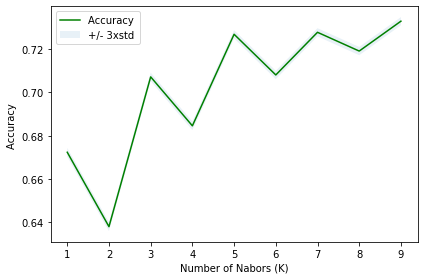

The best accuracy was with 0.7329220802853296 with k= 9


In [8]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### We see that best results for this model is with k = 9. Lets get evaluation metrics for k = 9 on the test set.

In [9]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_testset, y_testset)
neigh
yhat = neigh.predict(X_testset)

knn_test_acc = metrics.accuracy_score(y_testset, neigh.predict(X_testset))
knn_f1_test = f1_score(y_testset, yhat, average='weighted')
knn_jaccard_test = jaccard_similarity_score(y_testset, yhat)


print("KNN Test set Accuracy: ", knn_test_acc)
print('KNN F1 Socre: ', knn_f1_test)
print('KNN Jaccard Score: ', knn_jaccard_test)

KNN Train set Accuracy:  0.743003239072679
KNN F1 Socre:  0.7334224164062407
KNN Jaccard Score:  0.743003239072679


### Using all variables above we can predict with .73 accuracy the severity of an accident, with k = 9. However, an arugment can be made that variables such as 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', and 'VEHCOUNT' should be removed. One does not need a machine learning model to predict if an accident involving pedistrians, bicyclest or multi car accients may be severe. Also, PERSONCOUNT may be removed as one can assume that the odds of an injury increase as there are more individuals invovled in an accident who may be injured. Let us focus on features related to road contitions, weather and lighting only. 

In [10]:
x_list = ['WEATHER', 'ROADCOND', 'LIGHTCOND']

X = df[x_list].values

for feature in x_list:
    feature_index = x_list.index(feature)
    if feature in convert_variables:
        print(feature, feature_index)
        value_count = df[feature].value_counts()
        feature_list = []
        for category in value_count.index:
            feature_list.append(category)
        le_feature = preprocessing.LabelEncoder()
        le_feature.fit(feature_list)
        X[:,feature_index] = le_feature.transform(X[:,feature_index])


X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

y = df['SEVERITYDESC']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

WEATHER 0
ROADCOND 1
LIGHTCOND 2


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


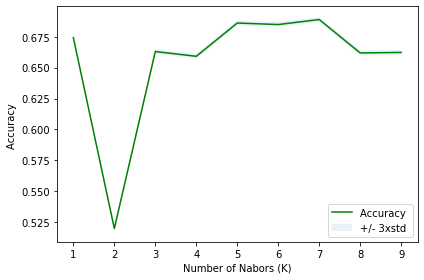

The best accuracy was with 0.6889398405939513 with k= 7


In [11]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### We see that this model is slightly less accurate than the former, at .68 accuracy, with k = 7. Next, see how this compares to using only the type of collison and type of intersection.

### We see that best results for this model is with k = 7. Lets get evaluation metrics for k = 7 on the test set.

In [12]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_testset, y_testset)
neigh
yhat = neigh.predict(X_testset)

knn_test_acc = metrics.accuracy_score(y_testset, neigh.predict(X_testset))
knn_f1_test = f1_score(y_testset, yhat, average='weighted')
knn_jaccard_test = jaccard_similarity_score(y_testset, yhat)


print("KNN Test set Accuracy: ", knn_test_acc)
print('KNN F1 Socre: ', knn_f1_test)
print('KNN Jaccard Score: ', knn_jaccard_test)

KNN Train set Accuracy:  0.6847181278887797
KNN F1 Socre:  0.5755876059840361
KNN Jaccard Score:  0.6847181278887797


### Now compare to results for Collisoin type and junction type.

COLLISIONTYPE 0
JUNCTIONTYPE 1
[[0 1]
 [9 4]
 [5 4]
 ...
 [3 1]
 [1 1]
 [7 4]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


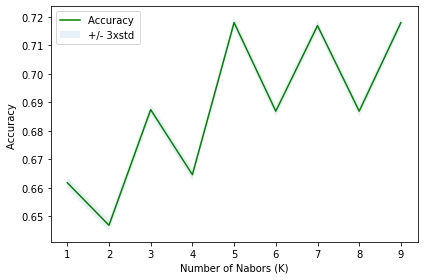

The best accuracy was with 0.717964115442006 with k= 5


In [13]:
x_list = ['COLLISIONTYPE', 'JUNCTIONTYPE']

X = df[x_list].values

for feature in x_list:
    feature_index = x_list.index(feature)
    if feature in convert_variables:
        print(feature, feature_index)
        value_count = df[feature].value_counts()
        feature_list = []
        for category in value_count.index:
            feature_list.append(category)
        le_feature = preprocessing.LabelEncoder()
        le_feature.fit(feature_list)
        X[:,feature_index] = le_feature.transform(X[:,feature_index])

print(X)

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

y = df['SEVERITYDESC']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### Using 'COLLISIONTYPE', 'JUNCTIONTYPE' only, accuracy is slightly less than our model including all variables at .71 accuraccy, with K = 5. Now, get evaluation metrics for the test set.

In [14]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_testset, y_testset)
neigh
yhat = neigh.predict(X_testset)

knn_test_acc = metrics.accuracy_score(y_testset, neigh.predict(X_testset))
knn_f1_test = f1_score(y_testset, yhat, average='weighted')
knn_jaccard_test = jaccard_similarity_score(y_testset, yhat)


print("KNN Test set Accuracy: ", knn_test_acc)
print('KNN F1 Socre: ', knn_f1_test)
print('KNN Jaccard Score: ', knn_jaccard_test)

KNN Train set Accuracy:  0.6992211667940459
KNN F1 Socre:  0.6678779124154328
KNN Jaccard Score:  0.6992211667940459


### Now, lets compare KNN results to logistic regression. For simplicity, only the model with ROADCON and JUNCTIONTYPE were compared as this was our best model.

In [17]:
x_list = ['COLLISIONTYPE', 'JUNCTIONTYPE']

X = df[x_list].values

for feature in x_list:
    feature_index = x_list.index(feature)
    if feature in convert_variables:
        print(feature, feature_index)
        value_count = df[feature].value_counts()
        feature_list = []
        for category in value_count.index:
            feature_list.append(category)
        le_feature = preprocessing.LabelEncoder()
        le_feature.fit(feature_list)
        X[:,feature_index] = le_feature.transform(X[:,feature_index])

print(X)

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

y = df['SEVERITYDESC']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)### Now, lets compare the results we found from KNN models to Logistic Regression. For simplicity, we will compare the results usint ______ which is our best result above.

COLLISIONTYPE 0
JUNCTIONTYPE 1
[[0 1]
 [9 4]
 [5 4]
 ...
 [3 1]
 [1 1]
 [7 4]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset, y_trainset)
LR
yhat = LR.predict(X_testset)
yhat

yhat_prob = LR.predict_proba(X_testset)
yhat_prob

print('Jaccard score: ', jaccard_similarity_score(y_testset, yhat), ', Log loss: ', log_loss(y_testset, yhat_prob))
print (classification_report(y_testset, yhat))

Jaccard score:  0.6915056228845944 , Log loss:  0.5980212374406664
                                precision    recall  f1-score   support

              Injury Collision       0.38      0.00      0.00     16934
Property Damage Only Collision       0.69      1.00      0.82     38020

                     micro avg       0.69      0.69      0.69     54954
                     macro avg       0.54      0.50      0.41     54954
                  weighted avg       0.60      0.69      0.57     54954



In [26]:
x_list = ['WEATHER', 'ROADCOND', 'LIGHTCOND']

X = df[x_list].values

for feature in x_list:
    feature_index = x_list.index(feature)
    if feature in convert_variables:
        print(feature, feature_index)
        value_count = df[feature].value_counts()
        feature_list = []
        for category in value_count.index:
            feature_list.append(category)
        le_feature = preprocessing.LabelEncoder()
        le_feature.fit(feature_list)
        X[:,feature_index] = le_feature.transform(X[:,feature_index])


X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

y = df['SEVERITYDESC']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset, y_trainset)
LR
yhat = LR.predict(X_testset)
yhat

yhat_prob = LR.predict_proba(X_testset)
yhat_prob

print('Jaccard score: ', jaccard_similarity_score(y_testset, yhat), ', Log loss: ', log_loss(y_testset, yhat_prob))
print (classification_report(y_testset, yhat))



WEATHER 0
ROADCOND 1
LIGHTCOND 2


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Jaccard score:  0.6918513665975179 , Log loss:  0.611480023359867


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                precision    recall  f1-score   support

              Injury Collision       0.00      0.00      0.00     16934
Property Damage Only Collision       0.69      1.00      0.82     38020

                     micro avg       0.69      0.69      0.69     54954
                     macro avg       0.35      0.50      0.41     54954
                  weighted avg       0.48      0.69      0.57     54954

